# Task
Create a Streamlit application that predicts income based on the "adult 3.csv" dataset. The application should load the data, handle missing values, preprocess the data, train a machine learning model, evaluate the model, save the trained model as "best_model.pkl", and then use the saved model to make predictions through a user interface. The application should be designed with attractive styling.

## Load the dataset

### Subtask:
Load the "adult 3.csv" dataset into a pandas DataFrame.


**Reasoning**:
Load the "adult 3.csv" dataset into a pandas DataFrame as instructed.



In [108]:
data = pd.read_csv("/content/adult 3.csv")

In [109]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/adult 3.csv")

# Display the first 5 rows
display(data.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [110]:
# Check for missing values
display(data.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# Task
Create a Streamlit application that predicts income based on the "adult 3.csv" dataset. The application should load the dataset, handle missing values, preprocess the data, train a machine learning model, and use the trained model to make predictions. The application should be designed with attractive styling.

## Handle missing values

### Subtask:
Inspect and handle any missing values, including replacing '?' with a suitable value.


**Reasoning**:
Inspect value counts for 'workclass', 'occupation', and 'native-country' to identify '?' and replace them with 'Others'. Then, check the value counts again to verify the replacement.



In [111]:
print(data['workclass'].value_counts())
data['workclass'] = data['workclass'].replace('?', 'Others')
print(data['workclass'].value_counts())

print(data['occupation'].value_counts())
data['occupation'] = data['occupation'].replace('?', 'Others')
print(data['occupation'].value_counts())

print(data['native-country'].value_counts())
data['native-country'] = data['native-country'].replace('?', 'Others')
print(data['native-country'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6

## Preprocess the data

### Subtask:
Clean and transform the data, including handling categorical features and outliers.


**Reasoning**:
Remove rows with 'Without-pay' and 'Never-worked' in 'workclass', remove outliers from 'age' and 'educational-num', drop the 'education' column, and apply Label Encoding to the specified categorical columns.



In [112]:
# 1. Remove rows where 'workclass' is 'Without-pay' or 'Never-worked'.
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

# 2. Remove outliers from the 'age' column by keeping values between 17 and 75 (inclusive).
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

# 3. Remove outliers from the 'educational-num' column by keeping values between 5 and 16 (inclusive).
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

# 4. Drop the 'education' column as it is redundant with 'educational-num'.
data = data.drop(columns=['education'])

# 5. Apply Label Encoding to the categorical columns.
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

display(data.head())
display(data.shape)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


(46720, 14)

## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into features (x) and target variable (y), then split these into training and testing sets using train_test_split.



In [113]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
37535,53,3,324568,7,2,2,0,4,1,0,0,45,39
22061,41,3,342164,10,0,12,1,4,0,0,0,15,39
22055,58,1,92141,12,6,0,1,2,0,0,0,40,39
39792,47,4,215620,14,2,3,0,4,1,15024,0,55,39
7296,62,3,185503,14,2,3,0,4,1,0,0,50,39


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
3585,46,6,104908,9,4,7,4,2,0,0,0,40,39
19036,24,3,211345,10,4,7,3,4,0,0,0,40,25
34236,27,5,66473,13,2,3,0,4,1,0,0,50,39
30081,40,3,162098,9,0,0,4,4,0,0,0,30,39
7514,63,3,697806,9,2,14,0,4,1,0,0,60,39


,income
37535,<=50K
22061,<=50K
22055,<=50K
39792,>50K
7296,>50K


,income
3585,<=50K
19036,<=50K
34236,<=50K
30081,<=50K
7514,<=50K


## Train a model

### Subtask:
Train a machine learning model for income prediction.


**Reasoning**:
Train and evaluate multiple machine learning models on the prepared data and store their accuracy scores.



In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7981
RandomForest Accuracy: 0.8505
KNN Accuracy: 0.7708
SVM Accuracy: 0.7884
GradientBoosting Accuracy: 0.8557


## Evaluate the model

### Subtask:
Evaluate the performance of the trained model.


**Reasoning**:
Evaluate the trained models by printing classification reports and visualizing accuracy scores.




Classification Report for LogisticRegression:
              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87      7010
        >50K       0.67      0.37      0.48      2334

    accuracy                           0.80      9344
   macro avg       0.75      0.66      0.68      9344
weighted avg       0.78      0.80      0.78      9344


Classification Report for RandomForest:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344


Classification Report for KNN:
              precision    recall  f1-score   support

       <=50K       0.80      0.92      0.86      7010
        >50K       0.57      0.33      0.42      2334

    accuracy                           0.77      9344
   macro

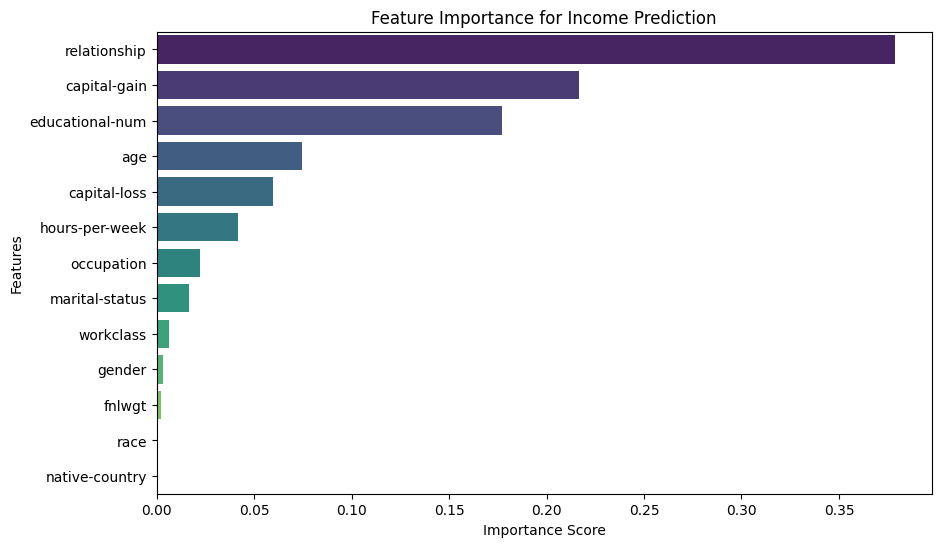

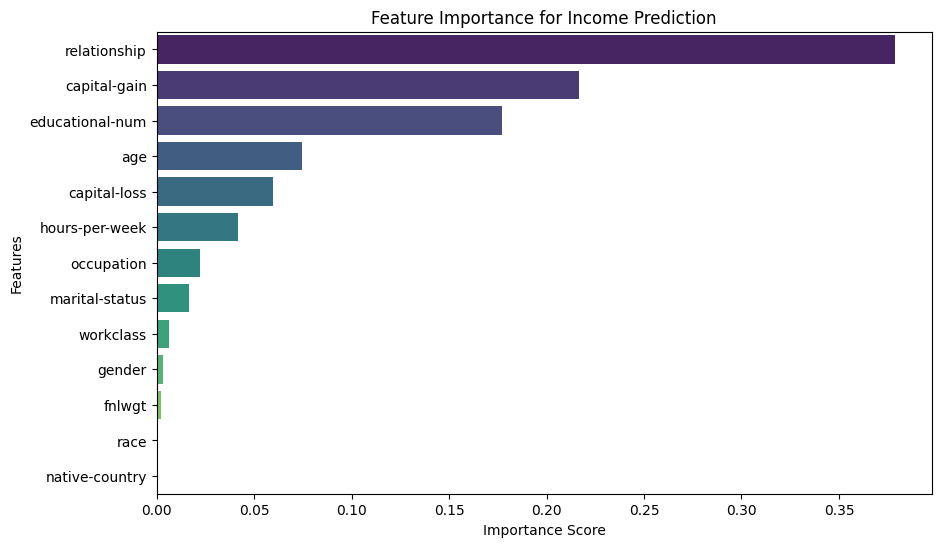

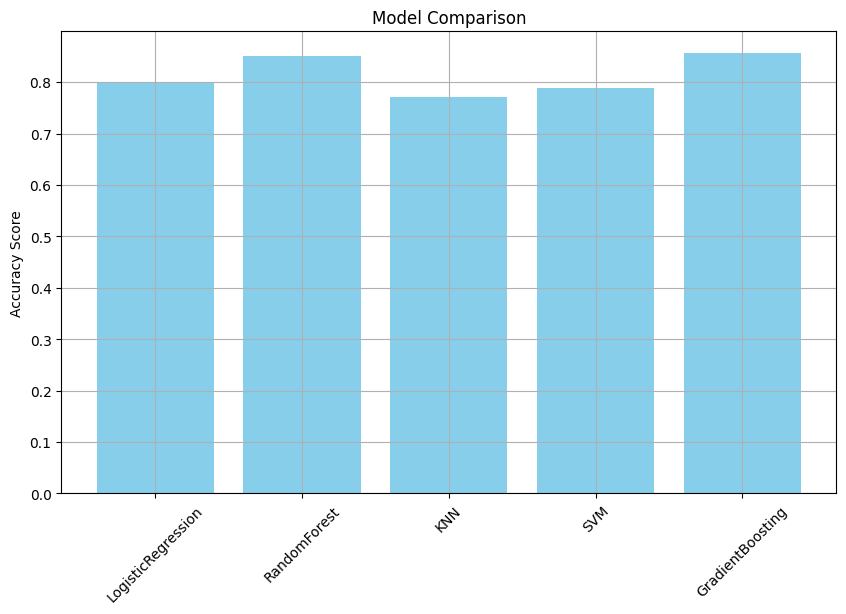

In [115]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Save the trained model

### Subtask:
Save the trained model to a file.


**Reasoning**:
Import joblib, identify the best model, and save it to a file.



In [116]:
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

joblib.dump(best_model, "best_model.pkl")
print(f"✅ Saved best model ({best_model_name}) as best_model.pkl")

✅ Saved best model (GradientBoosting) as best_model.pkl


## Create a streamlit application

### Subtask:
Develop a Streamlit script (`app.py`) to serve the model.


**Reasoning**:
Create the app.py file with the Streamlit code to serve the model as instructed.



In [117]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

# Get the current directory
current_dir = os.getcwd()
st.write(f"Current working directory: {current_dir}")
st.write(f"Files in current directory: {os.listdir(current_dir)}")

model_path = os.path.join(current_dir, "best_model.pkl")

# Load the best model
try:
    model = joblib.load(model_path)
    st.success("Model loaded successfully!")
except FileNotFoundError:
    st.error(f"Error: Model file not found at {model_path}. Please ensure 'best_model.pkl' exists.")
    st.stop() # Stop the app if the model file is not found
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

st.markdown("<h1 style='text-align: center; color: #1E90FF;'>Income Prediction App</h1>", unsafe_allow_html=True)

st.markdown("---")

st.write("Enter the following information to predict income:")

# Create input fields for each feature
with st.sidebar:
    st.markdown("<h2 style='text-align: center; color: #1E90FF;'>Personal Information</h2>", unsafe_allow_html=True)
    age = st.slider("Age", min_value=17, max_value=75, value=30)
    gender = st.selectbox("Gender", ['Male', 'Female'])
    race = st.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
    native_country = st.selectbox("Native Country", ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands', 'Thailand', 'Guatemala', 'Nicaragua', 'Scotland', 'Columbia', 'Laos', 'Taiwan', 'Haiti', 'Hungary', 'atemala-Total', 'Cuba-Total', 'England-Total', 'Germany-Total', 'Greece-Total', 'India-Total', 'Iran-Total', 'Ireland-Total', 'Italy-Total', 'Jamaica-Total', 'Japan-Total', 'Laos-Total', 'Mexico-Total', 'Nicaragua-Total', 'Peru-Total', 'Philippines-Total', 'Poland-Total', 'Puerto-Rico-Total', 'Scotland-Total', 'South-Total', 'Taiwan-Total', 'Thailand-Total', 'Trinadad&Tobago-Total', 'United-States-Total', 'Vietnam-Total', 'Yugoslavia', '?'])

st.markdown("<h2 style='text-align: center; color: #1E90FF;'>Employment and Financial Information</h2>", unsafe_allow_html=True)
workclass = st.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Local-gov', 'Others', 'State-gov', 'Self-emp-inc', 'Federal-gov'])
fnlwgt = st.number_input("Fnlwgt", value=100000)
educational_num = st.slider("Educational Num", min_value=5, max_value=16, value=10)
marital_status = st.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'])
occupation = st.selectbox("Occupation", ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Others', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'])
relationship = st.selectbox("Relationship", ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'])
capital_gain = st.number_input("Capital Gain", value=0)
capital_loss = st.number_input("Capital Loss", value=0)
hours_per_week = st.slider("Hours per Week", min_value=1, max_value=99, value=40)

# Create a dictionary with the input values
input_data = {
    'age': age,
    'workclass': workclass,
    'fnlwgt': fnlwgt,
    'educational-num': educational_num,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country
}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Preprocess the input data (Label Encoding for categorical features)
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Define categories explicitly based on the training data
workclass_categories = ['Federal-gov', 'Local-gov', 'Others', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov']
marital_status_categories = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation_categories = ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Others', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
relationship_categories = ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
race_categories = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
gender_categories = ['Female', 'Male']
native_country_categories = ['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Cuba-Total', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'England-Total', 'France', 'Germany', 'Germany-Total', 'Greece', 'Greece-Total', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'India-Total', 'Iran', 'Iran-Total', 'Ireland', 'Ireland-Total', 'Italy', 'Italy-Total', 'Jamaica', 'Jamaica-Total', 'Japan', 'Japan-Total', 'Laos', 'Laos-Total', 'Mexico', 'Mexico-Total', 'Nicaragua', 'Nicaragua-Total', 'Others', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Peru-Total', 'Philippines', 'Philippines-Total', 'Poland', 'Poland-Total', 'Portugal', 'Puerto-Rico', 'Puerto-Rico-Total', 'Scotland', 'Scotland-Total', 'Self-emp-inc', 'South', 'South-Total', 'Taiwan', 'Taiwan-Total', 'Thailand', 'Thailand-Total', 'Trinadad&Tobago', 'Trinadad&Tobago-Total', 'United-States', 'United-States-Total', 'Vietnam', 'Vietnam-Total', 'Yugoslavia', 'atemala-Total']


encoders = {}
for col, categories in zip(categorical_cols, [workclass_categories, marital_status_categories, occupation_categories, relationship_categories, race_categories, gender_categories, native_country_categories]):
    encoder = LabelEncoder()
    encoder.fit(categories)
    input_df[col] = encoder.transform(input_df[col])

# Make prediction
if st.button("Predict Income"):
    try:
        prediction = model.predict(input_df)
        st.subheader("Prediction:")
        if prediction[0] == '<=50K':
            st.success("The predicted income is <=50K")
        else:
            st.warning("The predicted income is >50K")
    except Exception as e:
        st.error(f"Error during prediction: {e}")

# Display Feature Importance (assuming the best model is GradientBoostingClassifier)
if hasattr(model, 'feature_importances_'):
    st.subheader("Feature Importance")
    feature_importances = pd.Series(model.feature_importances_, index=input_df.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title("Feature Importance for Income Prediction")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    st.pyplot(plt)
else:
    st.info("Feature importance is not available for the selected model.")

Writing app.py


## Run the streamlit application

### Subtask:
Execute the Streamlit app to interact with the model.


**Reasoning**:
Execute the Streamlit application file to run the web server and provide the user interface for income prediction.



In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.12.152:8501

